In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy
import pandas as pd
import os
import re

In [24]:
# path = "PRyMrates/thermo/stasis_abundances.txt"
path = "PRyMrates/thermo/abundances.txt"
with open(path, "r") as f:
    for line in f:
        if not line.startswith("#"):
            # Split header by commas (even with spaces)
            header = re.split(r',\s*', line.strip())
            break

# Read the data (space/tab-separated)
df = pd.read_csv(
    path,
    comment="#",
    sep=r'\s+',  
    skiprows=1    
)

# Assign cleaned column names
df.columns = header
df.head()


,t_s [s],Tg [MeV],rho_tot,rho_rad,rho_m,rho_m_check,Omega_m,Omega_rad,Omega_m_check
0,0.007517,9.912722,34103.37,34145.31,-41.94546,136581.2,-0.00123,1.00123,0.8
1,0.007650,9.826192,32928.04,32968.53,-40.49878,131874.1,-0.00123,1.00123,0.8
2,0.007786,9.740414,31793.20,31832.30,-39.10194,127329.2,-0.00123,1.00123,0.8
3,0.007923,9.655383,30697.43,30735.19,-37.75323,122940.7,-0.00123,1.00123,0.8
4,0.008063,9.571092,29639.40,29675.85,-36.45098,118703.4,-0.00123,1.00123,0.8


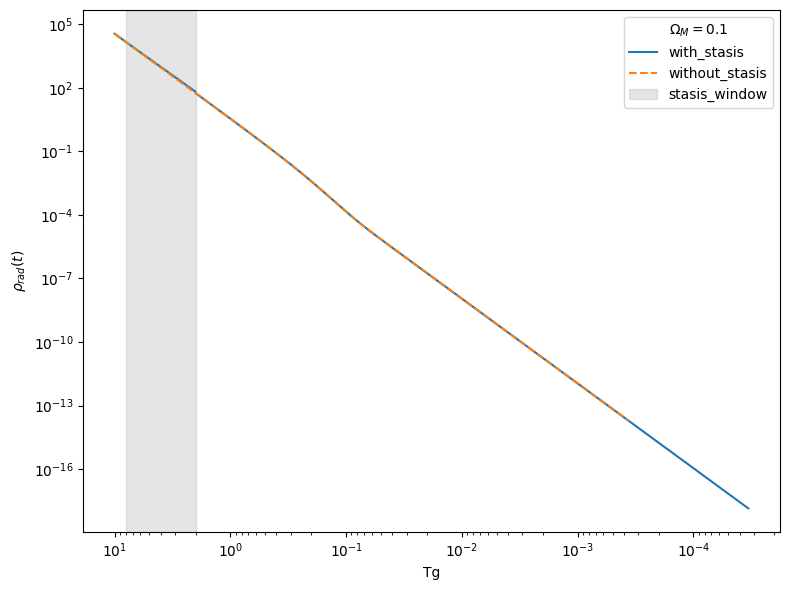

In [146]:
t1, Tg1, rho_tot1, rho_rad1, rho_m1, rho_dm1, rho_m_check1, Omega_m1, Omega_rad1, Omega_m_check1 = \
    np.loadtxt("PRyMrates/thermo/stasis_abundances.txt", unpack=True, skiprows=1)

t2, Tg2, rho_tot2, rho_rad2, rho_m2, _, rho_m_check2, Omega_m2, Omega_rad2, Omega_m_check2 = \
    np.loadtxt("PRyMrates/thermo/abundances.txt", unpack=True, skiprows=1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(Tg1, rho_rad1, label="with_stasis")
ax.plot(Tg2, rho_rad2, label="without_stasis", linestyle="--")

# ax.plot(Tg1, Omega_rad1, label="with_stasis")
# ax.plot(Tg2, Omega_rad2, label="without_stasis", linestyle="--")

ax.axvspan(2, 8, color='gray', alpha=0.2, label='stasis_window')

ax.set_xlabel("Tg")
ax.set_ylabel(r"$\rho_{rad}(t)$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()

ax.legend(title=r"$\Omega_M = 0.1$")

plt.tight_layout()
plt.show()

902.6900000000023


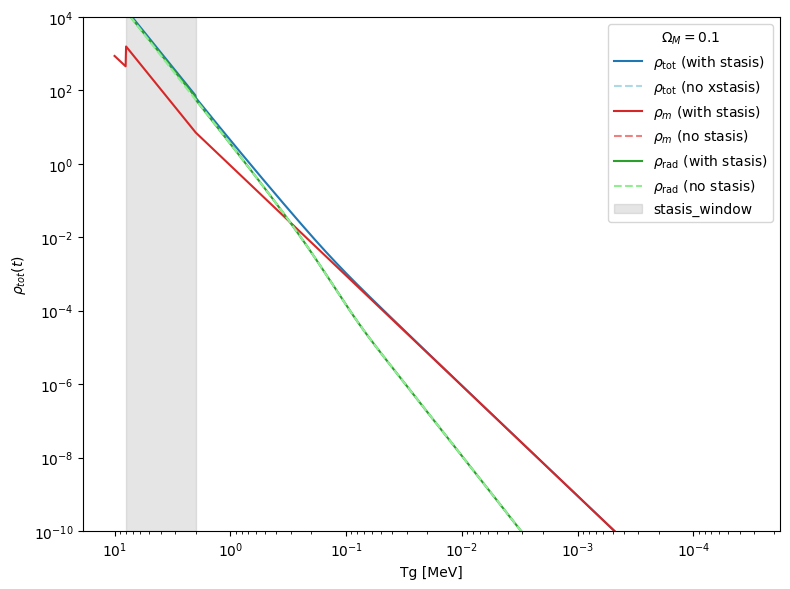

In [150]:
t1, Tg1, rho_tot1, rho_rad1, rho_m1, rho_dm1, rho_m_check1, Omega_m1, Omega_rad1, Omega_m_check1 = \
    np.loadtxt("PRyMrates/thermo/stasis_abundances.txt", unpack=True, skiprows=1)

t2, Tg2, rho_tot2, rho_rad2, rho_m2, _, rho_m_check2, Omega_m2, Omega_rad2, Omega_m_check2 = \
    np.loadtxt("PRyMrates/thermo/abundances.txt", unpack=True, skiprows=1)


# mask1 = (Tg1 <= 9) & (Tg1 >= 6)
# mask2 = (Tg2 <= 8) & (Tg2 >= 6)

# ymin = min(rho_tot1[mask1].min(), rho_tot2[mask2].min())
# ymax = max(rho_tot1[mask1].max(), rho_tot2[mask2].max())

# print(ymin,ymax)
print(rho_tot1[0] - rho_tot2[0])

# pick base and light colors for each quantity
colors = {
    'tot': 'tab:blue',
    'm':   'tab:red',
    'rad': 'tab:green'
}
light = {
    'tot': 'lightblue',
    'm':   'lightcoral',
    'rad': 'lightgreen'
}

fig, ax = plt.subplots(figsize=(8,6))

# total energy density
ax.plot(Tg1, rho_tot1,color=colors['tot'],label=r'$\rho_{\rm tot}$ (with stasis)')
ax.plot(Tg2, rho_tot2,linestyle='--',color=light['tot'],label=r'$\rho_{\rm tot}$ (no xstasis)')

# matter energy density
ax.plot(Tg1, rho_m1,color=colors['m'],label=r'$\rho_{m}$ (with stasis)')
ax.plot(Tg2, rho_m2,linestyle='--',color=light['m'],label=r'$\rho_{m}$ (no stasis)')

# radiation energy density
ax.plot(Tg1, rho_rad1,color=colors['rad'],label=r'$\rho_{\rm rad}$ (with stasis)')
ax.plot(Tg2, rho_rad2,linestyle='--',color=light['rad'],label=r'$\rho_{\rm rad}$ (no stasis)')

# highlight the stasis window
ax.axvspan(2, 8, color='gray', alpha=0.2, label='stasis_window')

# ax.set_xlim(6, 9)
# ax.set_ylim(ymin*100, ymax*1.5)   # add a little margin
ax.set_ylim(1e-10, 1e4)


ax.set_xlabel("Tg [MeV]")
ax.set_ylabel(r"$\rho_{tot}(t)$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()

# ax.set_aspect("equal", adjustable="box")

ax.legend(title=r"$\Omega_M = 0.1$")
plt.tight_layout()
plt.show()

902.6900000000023


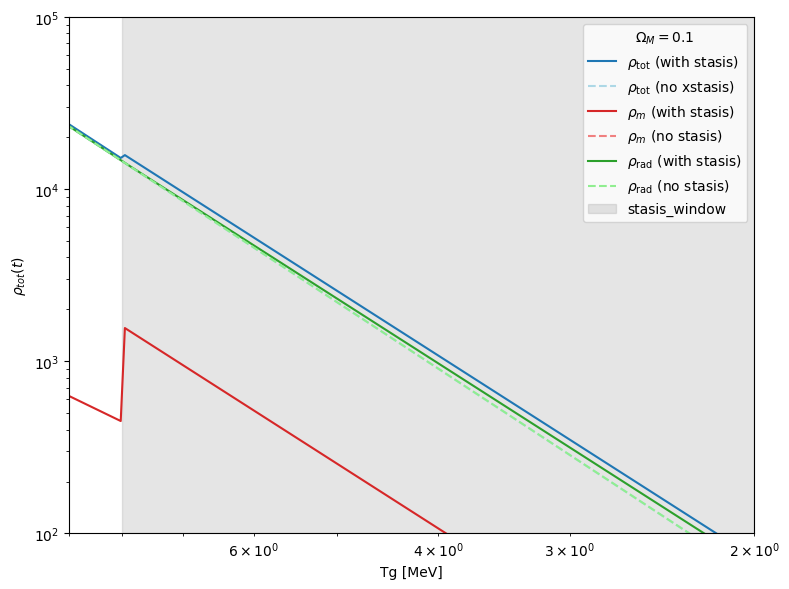

In [154]:
t1, Tg1, rho_tot1, rho_rad1, rho_m1, rho_dm1, rho_m_check1, Omega_m1, Omega_rad1, Omega_m_check1 = \
    np.loadtxt("PRyMrates/thermo/stasis_abundances.txt", unpack=True, skiprows=1)

t2, Tg2, rho_tot2, rho_rad2, rho_m2, _, rho_m_check2, Omega_m2, Omega_rad2, Omega_m_check2 = \
    np.loadtxt("PRyMrates/thermo/abundances.txt", unpack=True, skiprows=1)


# mask1 = (Tg1 <= 9) & (Tg1 >= 6)
# mask2 = (Tg2 <= 8) & (Tg2 >= 6)

# ymin = min(rho_tot1[mask1].min(), rho_tot2[mask2].min())
# ymax = max(rho_tot1[mask1].max(), rho_tot2[mask2].max())

# print(ymin,ymax)
print(rho_tot1[0] - rho_tot2[0])

# pick base and light colors for each quantity
colors = {
    'tot': 'tab:blue',
    'm':   'tab:red',
    'rad': 'tab:green'
}
light = {
    'tot': 'lightblue',
    'm':   'lightcoral',
    'rad': 'lightgreen'
}

fig, ax = plt.subplots(figsize=(8,6))

# total energy density
ax.plot(Tg1, rho_tot1,color=colors['tot'],label=r'$\rho_{\rm tot}$ (with stasis)')
ax.plot(Tg2, rho_tot2,linestyle='--',color=light['tot'],label=r'$\rho_{\rm tot}$ (no xstasis)')

# matter energy density
ax.plot(Tg1, rho_m1,color=colors['m'],label=r'$\rho_{m}$ (with stasis)')
ax.plot(Tg2, rho_m2,linestyle='--',color=light['m'],label=r'$\rho_{m}$ (no stasis)')

# radiation energy density
ax.plot(Tg1, rho_rad1,color=colors['rad'],label=r'$\rho_{\rm rad}$ (with stasis)')
ax.plot(Tg2, rho_rad2,linestyle='--',color=light['rad'],label=r'$\rho_{\rm rad}$ (no stasis)')

# highlight the stasis window
ax.axvspan(2, 8, color='gray', alpha=0.2, label='stasis_window')

ax.set_xlim(2, 9)
# ax.set_ylim(ymin*100, ymax*1.5)   # add a little margin
ax.set_ylim(1e2, 1e5)


ax.set_xlabel("Tg [MeV]")
ax.set_ylabel(r"$\rho_{tot}(t)$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()

# ax.set_aspect("equal", adjustable="box")

ax.legend(title=r"$\Omega_M = 0.1$")
plt.tight_layout()
plt.show()

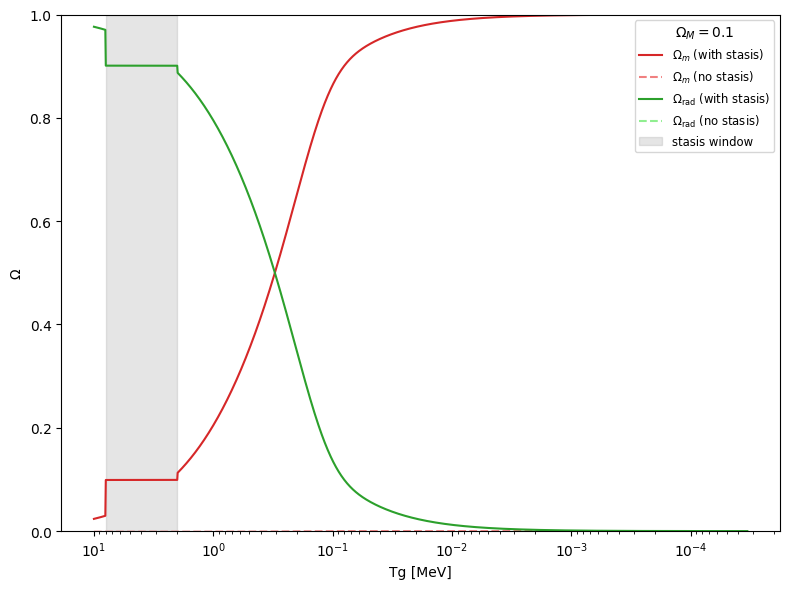

In [155]:
# load your data
t1, Tg1, rho_tot1, rho_rad1, rho_m1, rho_dm1, rho_m_check1, Omega_m1, Omega_rad1, Omega_m_check1 = \
    np.loadtxt("PRyMrates/thermo/stasis_abundances.txt", unpack=True, skiprows=1)

t2, Tg2, rho_tot2, rho_rad2, rho_m2, _, rho_m_check2, Omega_m2, Omega_rad2, Omega_m_check2 = \
    np.loadtxt("PRyMrates/thermo/abundances.txt", unpack=True, skiprows=1)

# same color styling as before
colors = {
    'tot': 'tab:blue',
    'm':   'tab:red',
    'rad': 'tab:green'
}
light = {
    'tot': 'lightblue',
    'm':   'lightcoral',
    'rad': 'lightgreen'
}

fig, ax = plt.subplots(figsize=(8,6))

# Omega_m with bold solid + light dashed
ax.plot(Tg1, Omega_m1,
        color=colors['m'],
        label=r'$\Omega_m$ (with stasis)')
ax.plot(Tg2, Omega_m2,
        linestyle='--',
        color=light['m'],
        label=r'$\Omega_m$ (no stasis)')

# Omega_rad with bold solid + light dashed
ax.plot(Tg1, Omega_rad1,
        color=colors['rad'],
        label=r'$\Omega_{\rm rad}$ (with stasis)')
ax.plot(Tg2, Omega_rad2,
        linestyle='--',
        color=light['rad'],
        label=r'$\Omega_{\rm rad}$ (no stasis)')

# highlight the stasis window
ax.axvspan(2, 8, color='gray', alpha=0.2, label='stasis window')

# axis settings
ax.set_xlabel("Tg [MeV]")
ax.set_ylabel(r"$\Omega$")
ax.set_xscale('log')
ax.invert_xaxis()            # Tg descending
ax.set_ylim(0, 1)            # Ω runs from 0 to 1

# legend and layout
ax.legend(loc='best', title=r"$\Omega_M = 0.1$", fontsize='small')
plt.tight_layout()
plt.show()